<a href="https://colab.research.google.com/github/tejalbarnwal/SOC_2021_tejal/blob/master/learning_phase/DogsvsCatsCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"


In [5]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [6]:
pwd

'/content/gdrive/My Drive/Kaggle'

In [7]:
ls

dog_cat/             dogs-vs-cats.zip  sampleSubmission.csv
DogsvsCatsCNN.ipynb  kaggle.json


In [ ]:
# unzipping the zip files and deleting the zip files
!unzip \*.zip

Archive:  dogs-vs-cats.zip
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
pwd

'/content/gdrive/My Drive/Kaggle'

In [ ]:
import zipfile
zip_train = zipfile.ZipFile("/content/gdrive/My Drive/Kaggle/dog_cat/train.zip", "r")
zip_train.extractall("/content/gdrive/My Drive/Kaggle/dog_cat")
zip_train.close()

In [ ]:
zip_test = zipfile.ZipFile("/content/gdrive/My Drive/Kaggle/dog_cat/test1.zip" , "r")
zip_test.extractall("/content/gdrive/My Drive/Kaggle/dog_cat")
zip_test.close()

NameError: ignored

In [ ]:
# thanks to https://towardsdatascience.com/an-informative-colab-guide-to-load-image-datasets-from-github-kaggle-and-local-machine-75cae89ffa1e


In [ ]:
len(os.listdir("/content/gdrive/My Drive/Kaggle/dog_cat/test1"))

KeyboardInterrupt: ignored

In [ ]:
pwd

'/content/gdrive/My Drive/Kaggle'

In [8]:
%cd /content/gdrive/My Drive/Kaggle/dog_cat/datsets

/content/gdrive/My Drive/Kaggle/dog_cat/datsets


In [9]:
ls


dataset_test/  dataset_validation/  dateset_train/


In [10]:
base_dir = "/content/gdrive/My Drive/Kaggle/dog_cat/datsets"
# os.mkdir(base_dir)

In [11]:
train_dir = os.path.join(base_dir,"dateset_train")
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,"dataset_validation")
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, "dataset_test")
# os.mkdir(test_dir)

In [12]:
train_cats_dir = os.path.join(train_dir , "cats")
# os.mkdir(train_cats_dir)

In [13]:
train_dogs_dir = os.path.join(train_dir , "dogs")
# os.mkdir(train_dogs_dir)

In [14]:
validation_cats_dir = os.path.join(validation_dir , "cats")
# os.mkdir(validation_cats_dir)

In [15]:
validation_dogs_dir = os.path.join(validation_dir, "dogs")
# os.mkdir(validation_dogs_dir)

In [16]:
test_cats_dir = os.path.join(test_dir , "cats")
# os.mkdir(test_cats_dir)

In [17]:
test_dogs_dir = os.path.join(test_dir, "dogs")
# os.mkdir(test_dogs_dir)

In [18]:
ori_train = "/content/gdrive/My Drive/Kaggle/dog_cat/train"
ori_test = "/content/gdrive/My Drive/Kaggle/dog_cat/test1"

In [ ]:
import shutil
fnames = ['cat.{}.jpg'.format(i) for i in range (1000)]
for fname in fnames:
  src = os.path.join(ori_train, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src , dst)

In [ ]:
fnames = ["cat.{}.jpg".format(i) for i in range (1000 , 1500)]
for fname in fnames:
  src = os.path.join(ori_train , fname)
  dst = os.path.join(validation_cats_dir , fname)
  shutil.copyfile(src,dst)

In [ ]:
fnames = ["cat.{}.jpg".format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(ori_train , fname)
  dst = os.path.join(test_cats_dir , fname)
  shutil.copyfile(src,dst)

In [ ]:
fnames = ["dog.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(ori_train , fname)
  dst = os.path.join(train_dogs_dir , fname)
  shutil.copyfile(src , dst)

In [ ]:
fnames = ["dog.{}.jpg".format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(ori_train , fname)
  dst = os.path.join(validation_dogs_dir , fname)
  shutil.copyfile(src , dst)

In [ ]:
fnames = ["dog.{}.jpg".format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(ori_train , fname)
  dst = os.path.join(test_dogs_dir , fname)
  shutil.copyfile(src , dst)

In [19]:
# lest do a sanity check
print("Training CAT images", len(os.listdir(train_cats_dir)))

print("Trainning DOG images" , len(os.listdir(train_dogs_dir)))

print("Validation CAT images", len(os.listdir(validation_cats_dir)))

print("Validation DOG images", len(os.listdir(validation_dogs_dir)))

print("Test CAT images", len(os.listdir(test_cats_dir)))

print("Test DOG images", len(os.listdir(test_dogs_dir)))

Training CAT images 1000
Trainning DOG images 1000
Validation CAT images 500
Validation DOG images 500
Test CAT images 500
Test DOG images 500


In [21]:
# 2000 training images
# 1000 validation images
# 1000 test images

In [22]:
# currently the data sits as jpg files in the gdrive directories
# they need to be converted into tensors
# so the steps to do the same are as follows:
    # read the pictures files
    # decode the jpeg content into rgb grids of pixels
    # convert these into floating point tensors
    # rescale the pixel values ( btw 0 and 255) to the [0,1] interval
# Keras has utilties to take care of these steps too
# Keras has modules with image-processing helper tools, located at keras.preprocessing.image
# it contains a class called ImageDataGenerator , which quickly sets up python generators that can 
# automatically turn image files on disk into batches of preprocessed tensors.


from keras.preprocessing.image import ImageDataGenerator

# rescale all images by 1/255
train_datagenerator = ImageDataGenerator(rescale = 1./255)
test_datagenerator = ImageDataGenerator(rescale = 1./255)

# resixe all images to (150,150)
# specify the target directory
train_generator = train_datagenerator.flow_from_directory(  train_dir,
                                                            target_size = (150,150),
                                                            batch_size = 20,
                                                            class_mode = "binary")

validation_generator = test_datagenerator.flow_from_directory( validation_dir,
                                                               target_size = (150,150),
                                                               batch_size = 20,
                                                               class_mode = "binary")



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
for data_batch , labels_batch in train_generator:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [24]:
## model

from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32 , (3,3) , activation="relu" , input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64 , (3,3) , activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3) , activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1 , activation="sigmoid"))


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [26]:
from keras import optimizers

model.compile( loss = "binary_crossentropy",
               optimizer = optimizers.RMSprop(lr=1e-4),
                metrics=["acc"])

In [27]:
# fitting the model to the data using the generator
# fit_generator method is equivalent to fit for data generators like this one..
# fit generator arguments:
    # first arg- python generator that yields batches of inputs and targets indefinitely
    # coz python generator generatores data endlessly, the keras model needs to know how many
    # samples to draw from the generator before declaring an epoch is over
    # this is the role for step_per_epoch
    # after hving run for steps_per_epoch gradient descent steps- the fitting process will go to 
    # the next epoch..
    # for this case we have , bathes as 20 samples so it wiill take 100 batches until you see your target 
    # of 2000 batches

history = model.fit_generator(train_generator,
                                  steps_per_epoch = 100,
                                  epochs = 30,
                                  validation_data = validation_generator,
                                  validation_steps = 50)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 662s 6s/step - loss: 0.6961 - acc: 0.4938 - val_loss: 0.6711 - val_acc: 0.6170
Epoch 2/30
100/100 [==============================] - 12s 119ms/step - loss: 0.6722 - acc: 0.5919 - val_loss: 0.6565 - val_acc: 0.5980
Epoch 3/30
100/100 [==============================] - 12s 119ms/step - loss: 0.6304 - acc: 0.6696 - val_loss: 0.6294 - val_acc: 0.6280
Epoch 4/30
100/100 [==============================] - 12s 118ms/step - loss: 0.5859 - acc: 0.6923 - val_loss: 0.6114 - val_acc: 0.6650
Epoch 5/30
100/100 [==============================] - 12s 118ms/step - loss: 0.5284 - acc: 0.7399 - val_loss: 0.5886 - val_acc: 0.6840
Epoch 6/30
100/100 [==============================] - 12s 118ms/step - loss: 0.5265 - acc: 0.7261 - val_loss: 0.5783 - val_acc: 0.7000
Epoch 7/30
100/100 [==============================] - 12s 118ms/step - loss: 0.4748 - acc: 0.7769 - val_loss: 0.5956 - val_acc: 0.6830
Epoch 8/30
100/100 [==============================] - 12s

In [28]:
model.save("cats_and_dogs_1.h5")

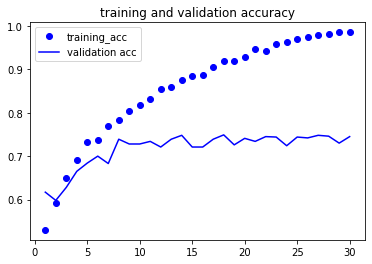

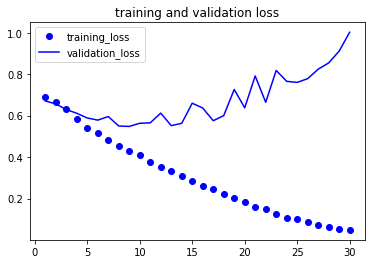

In [29]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1 , len(acc) + 1)

plt.plot(epochs , acc, "bo" , label="training_acc")
plt.plot(epochs , val_acc , "b" , label="validation acc")
plt.title("training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs , loss , "bo" , label="training_loss")
plt.plot(epochs , val_loss , "b" , label="validation_loss")
plt.title("training and validation loss")
plt.legend()

plt.show()

In [35]:
## data augmentation to mitigate overfitting
# data augmentation model starting here
datagen = ImageDataGenerator( rescale = 1./255,
                              rotation_range = 40,
                              width_shift_range = 0.2,
                              height_shift_range = 0.2,
                              shear_range = 0.2,
                              zoom_range = 0.2,
                              horizontal_flip = True)

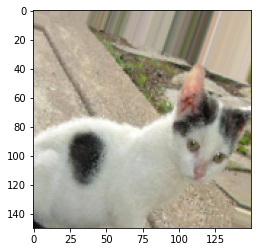

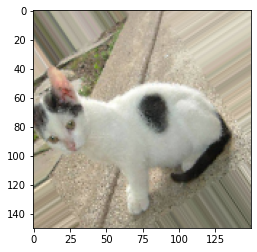

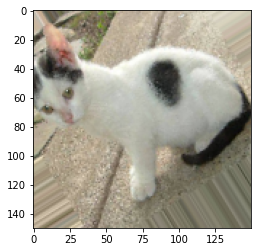

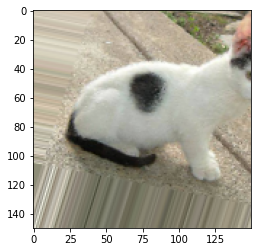

In [36]:
# module with image processing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir , fname) for fname 
          in os.listdir(train_cats_dir)]

# chooses one image to augment
img_path = fnames[3]
# reads the image and resizes it
img = image.load_img(img_path , target_size= (150,150))
# converts it into numpy array with shape (150,150,3)
x = image.img_to_array(img)
# reshapes it to (1 , 150 , 150 , 3)
x = x.reshape( (1,) + x.shape)

i = 0 
for batch in datagen.flow(x , batch_size = 1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

plt.show()

In [43]:
# definig a new convnet model that includes dropout

model = models.Sequential()

model.add(layers.Conv2D(32 , (3,3), activation="relu" , input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3) , activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128 , (3,3) , activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3) , activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1 , activation="sigmoid"))

model.compile(loss="binary_crossentropy" , 
              optimizer=optimizers.RMSprop(lr=1e-4), metrics = ["acc"])

In [48]:
# training the convnet using data-augmentation generators

train_datagen = ImageDataGenerator( rescale = 1./255,
                                    rotation_range = 40,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)

# validation data should be augmented
test_datagen = ImageDataGenerator( rescale = 1./255)

train_generator = train_datagen.flow_from_directory( train_dir ,
                                                     target_size = (150,150),
                                                     batch_size = 20,
                                                     class_mode = "binary")

validation_generator = test_datagen.flow_from_directory( validation_dir , 
                                                         target_size = (150 , 150),
                                                         batch_size = 20,
                                                         class_mode = "binary")

history = model.fit_generator( train_generator , steps_per_epoch=100 , epochs=100 ,
                               validation_data = validation_generator , 
                               validation_steps = 50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 20s 202ms/step - loss: 0.6858 - acc: 0.5385 - val_loss: 0.6643 - val_acc: 0.5950
Epoch 2/100
100/100 [==============================] - 20s 200ms/step - loss: 0.6703 - acc: 0.5730 - val_loss: 0.6527 - val_acc: 0.6140
Epoch 3/100
100/100 [==============================] - 20s 199ms/step - loss: 0.6648 - acc: 0.5885 - val_loss: 0.7227 - val_acc: 0.5080
Epoch 4/100
100/100 [==============================] - 20s 200ms/step - loss: 0.6516 - acc: 0.6155 - val_loss: 0.6235 - val_acc: 0.6540
Epoch 5/100
100/100 [==============================] - 20s 200ms/step - loss: 0.6389 - acc: 0.6245 - val_loss: 0.6182 - val_acc: 0.6420
Epoch 6/100
100/100 [==============================] - 20s 200ms/step - loss: 0.6325 - acc: 0.6540 - val_loss: 0.6025 - val_acc: 0.6690
Epoch 7/100
100/100 [==============================] - 20s 199ms/step - loss: 0.6113 - acc: 0.6580 - val_loss: 0.5943 - val_acc: 0.6850
Epoch 8/100
100/100 [===========================

In [49]:
model.save("cats_and_dogs_2.h5")

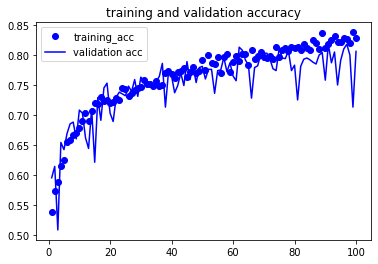

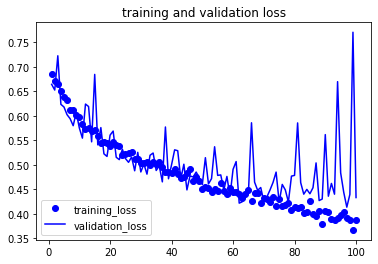

In [50]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1 , len(acc) + 1)

plt.plot(epochs , acc, "bo" , label="training_acc")
plt.plot(epochs , val_acc , "b" , label="validation acc")
plt.title("training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs , loss , "bo" , label="training_loss")
plt.plot(epochs , val_loss , "b" , label="validation_loss")
plt.title("training and validation loss")
plt.legend()

plt.show()